In [1]:
import numpy as np
import  matplotlib.pyplot as plt
%matplotlib notebook
import pandas as pd
import scipy as sp
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix, classification_report, accuracy_score, precision_score, recall_score
import seaborn as sns
from sklearn.model_selection import GridSearchCV
import random
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
random.seed(0)

In [2]:
df = pd.read_csv('./water_potability.csv')

In [3]:
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [4]:
df.shape

(3276, 10)

In [5]:
df.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [6]:
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


<IPython.core.display.Javascript object>


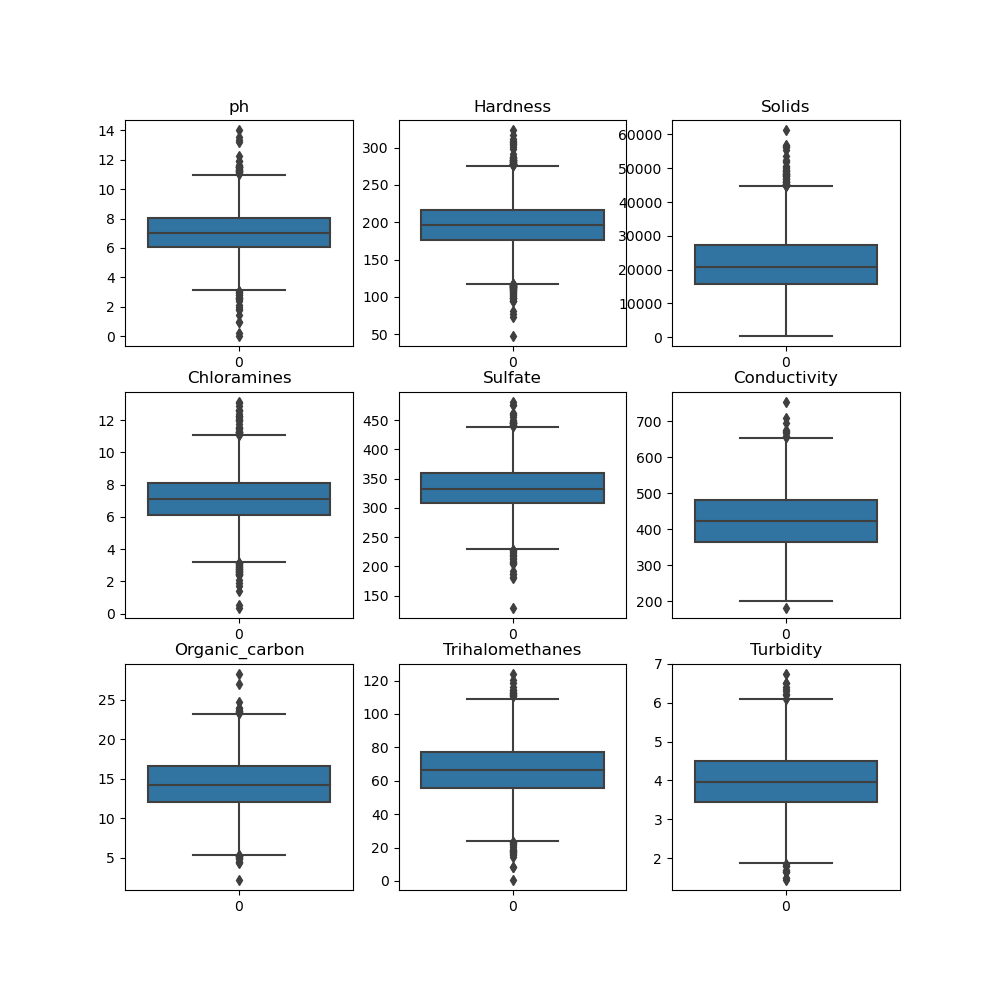

In [7]:
plt.figure(figsize=(10,10))
for i,j in zip(df.columns[:-1], range(len(df.columns)-1)):
    plt.subplot(3,3,j+1).set_title(i)
    sns.boxplot(data = df[i])
plt.show()

<IPython.core.display.Javascript object>


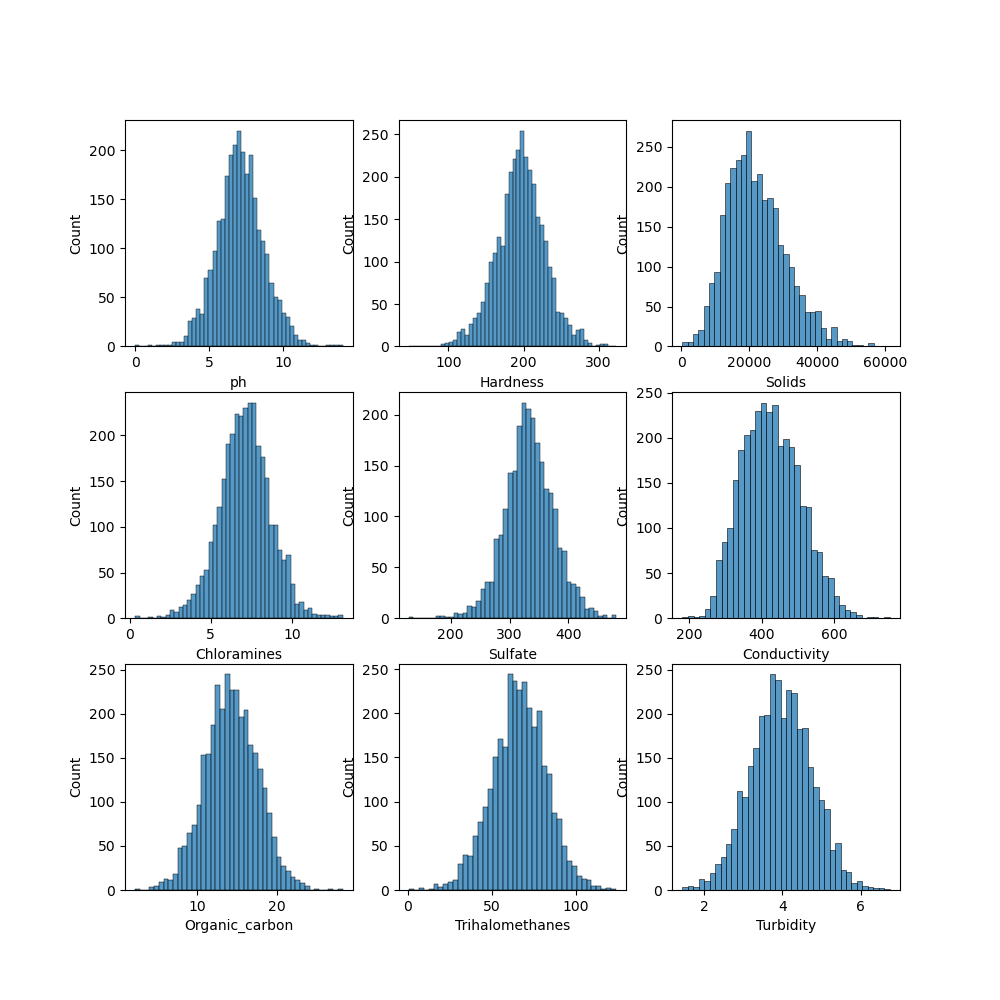

In [8]:
plt.figure(figsize=(10,10))
for i,j in zip(df.columns[:-1], range(len(df.columns)-1)):
    plt.subplot(3,3,j+1)
    sns.histplot(data = df[i])
plt.show()

In [9]:
ph = pd.Series(data=(np.random.choice(df[df.ph.notna()].ph, size=df.ph.isnull().sum())), index=df[df.ph.isnull()].ph.index)
Sulfate = pd.Series(data=(np.random.choice(df[df.Sulfate.notna()].Sulfate, size=df.Sulfate.isnull().sum())), index=df[df.Sulfate.isnull()].Sulfate.index)
Trihalomethanes = pd.Series(data=(np.random.choice(df[df.Trihalomethanes.notna()].Trihalomethanes, size=df.Trihalomethanes.isnull().sum())), index=df[df.Trihalomethanes.isnull()].Trihalomethanes.index)
values = {"ph": ph, "Sulfate": Sulfate, "Trihalomethanes": Trihalomethanes}
df.fillna(value=values, inplace=True)

In [10]:
df.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

In [11]:
df.corr()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
ph,1.000000,0.065095,-0.077447,-0.028297,0.002215,0.015765,0.028404,-0.012028,-0.033783,-0.011469
Hardness,0.065095,1.000000,-0.046899,-0.030054,-0.080234,-0.023915,0.003610,-0.008515,-0.014449,-0.013837
Solids,-0.077447,-0.046899,1.000000,-0.070148,-0.129238,0.013831,0.010242,-0.011038,0.019546,0.033743
Chloramines,-0.028297,-0.030054,-0.070148,1.000000,0.009924,-0.020486,-0.012653,0.021595,0.002363,0.023779
Sulfate,0.002215,-0.080234,-0.129238,0.009924,1.000000,-0.006580,0.026968,-0.017917,-0.002220,-0.008404
Conductivity,0.015765,-0.023915,0.013831,-0.020486,-0.006580,1.000000,0.020966,-0.001089,0.005798,-0.008128
Organic_carbon,0.028404,0.003610,0.010242,-0.012653,0.026968,0.020966,1.000000,-0.010242,-0.027308,-0.030001
Trihalomethanes,-0.012028,-0.008515,-0.011038,0.021595,-0.017917,-0.001089,-0.010242,1.000000,-0.016157,0.008315
Turbidity,-0.033783,-0.014449,0.019546,0.002363,-0.002220,0.005798,-0.027308,-0.016157,1.000000,0.001581
Potability,-0.011469,-0.013837,0.033743,0.023779,-0.008404,-0.008128,-0.030001,0.008315,0.001581,1.000000


<IPython.core.display.Javascript object>


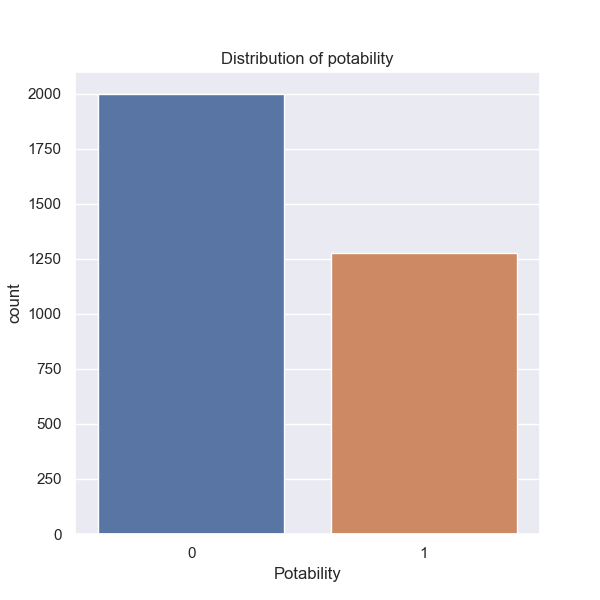

In [12]:
plt.figure(figsize=(6,6))
sns.set_theme(style="darkgrid")
sns.countplot(x = df['Potability'])
plt.title('Distribution of potability')
plt.show()

In [13]:
Y = df['Potability']
X = df.drop(columns=['Potability'])

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

In [15]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [16]:
tf.random.set_seed(0)


model = tf.keras.Sequential([
    tf.keras.layers.Dense(48, activation='relu'),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(12, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(
    loss=tf.keras.losses.binary_crossentropy,
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.03),
    metrics=[
        tf.keras.metrics.BinaryAccuracy(name='accuracy'),
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall')
    ]
)

history = model.fit(X_train_scaled, y_train, epochs=100)

Epoch 1/100
82/82 [==============================] - 1s 2ms/step - loss: 0.6618 - accuracy: 0.6187 - precision: 0.4444 - recall: 0.0161
Epoch 2/100
82/82 [==============================] - 0s 2ms/step - loss: 0.6459 - accuracy: 0.6252 - precision: 0.5371 - recall: 0.0945  
Epoch 3/100
82/82 [==============================] - 0s 2ms/step - loss: 0.6345 - accuracy: 0.6378 - precision: 0.6264 - recall: 0.1146  
Epoch 4/100
82/82 [==============================] - 0s 2ms/step - loss: 0.6318 - accuracy: 0.6382 - precision: 0.6850 - recall: 0.0874
Epoch 5/100
82/82 [==============================] - 0s 2ms/step - loss: 0.6276 - accuracy: 0.6508 - precision: 0.6869 - recall: 0.1477  
Epoch 6/100
82/82 [==============================] - 0s 2ms/step - loss: 0.6184 - accuracy: 0.6492 - precision: 0.6597 - recall: 0.1578
Epoch 7/100
82/82 [==============================] - 0s 2ms/step - loss: 0.6209 - accuracy: 0.6481 - precision: 0.6515 - recall: 0.1578
Epoch 8/100
82/82 [=======================

82/82 [==============================] - 0s 2ms/step - loss: 0.5107 - accuracy: 0.7099 - precision: 0.6634 - recall: 0.4794
Epoch 61/100
82/82 [==============================] - 0s 2ms/step - loss: 0.5219 - accuracy: 0.7057 - precision: 0.6697 - recall: 0.4442
Epoch 62/100
82/82 [==============================] - 0s 2ms/step - loss: 0.5219 - accuracy: 0.7053 - precision: 0.6595 - recall: 0.4633
Epoch 63/100
82/82 [==============================] - 0s 2ms/step - loss: 0.5166 - accuracy: 0.7099 - precision: 0.6489 - recall: 0.5146
Epoch 64/100
82/82 [==============================] - 0s 2ms/step - loss: 0.5161 - accuracy: 0.7126 - precision: 0.7123 - recall: 0.4080
Epoch 65/100
82/82 [==============================] - 0s 2ms/step - loss: 0.5177 - accuracy: 0.7134 - precision: 0.7111 - recall: 0.4131
Epoch 66/100
82/82 [==============================] - 0s 2ms/step - loss: 0.5129 - accuracy: 0.7080 - precision: 0.6904 - recall: 0.4191
Epoch 67/100
82/82 [==============================] - 

<IPython.core.display.Javascript object>


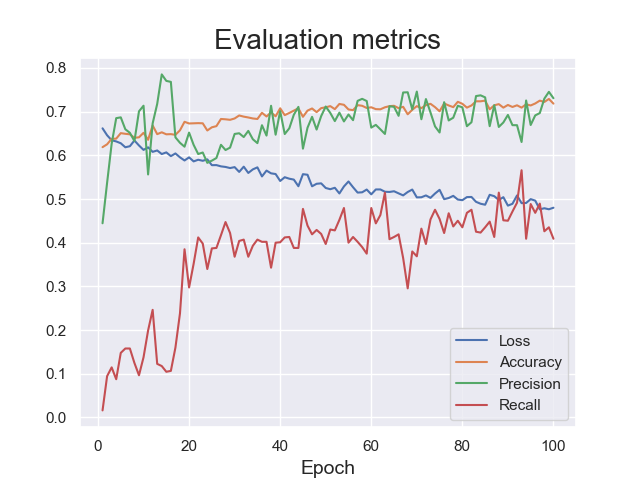

In [17]:
plt.plot(
    np.arange(1, 101), 
    history.history['loss'], label='Loss'
)
plt.plot(
    np.arange(1, 101), 
    history.history['accuracy'], label='Accuracy'
)
plt.plot(
    np.arange(1, 101), 
    history.history['precision'], label='Precision'
)
plt.plot(
    np.arange(1, 101), 
    history.history['recall'], label='Recall'
)
plt.title('Evaluation metrics', size=20)
plt.xlabel('Epoch', size=14)
plt.legend();

In [18]:
predictions = model.predict(X_test_scaled)

21/21 [==============================] - 0s 1ms/step


In [19]:
prediction_classes = [
    1 if prob > 0.5 else 0 for prob in np.ravel(predictions)
]

In [20]:
print(f'Accuracy: {accuracy_score(y_test, prediction_classes):.2f}')
print(f'Precision: {precision_score(y_test, prediction_classes):.2f}')
print(f'Recall: {recall_score(y_test, prediction_classes):.2f}')

Accuracy: 0.61
Precision: 0.60
Recall: 0.28


<IPython.core.display.Javascript object>


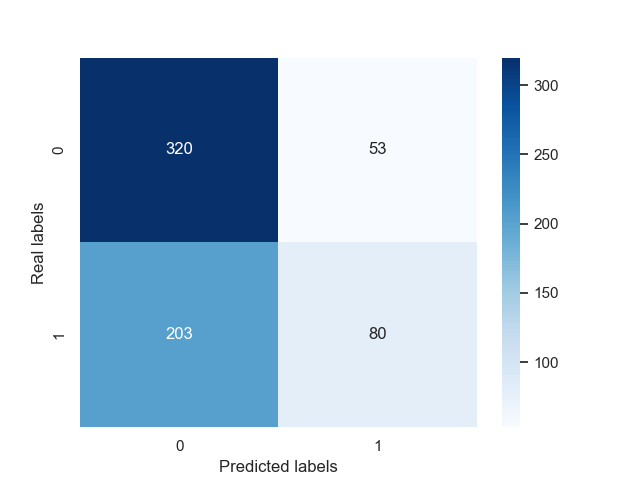

In [21]:
cnf_matrix = confusion_matrix(y_test, prediction_classes)
sns.heatmap(cnf_matrix, annot=True, cmap='Blues', fmt='g')
plt.ylabel('Real labels')
plt.xlabel('Predicted labels')
plt.show()